# **Visualización**
# AE07. Seaborn Heatmaps, Histogramas y Boxplot

Veamos más tipos de gráficos en Seaborn:


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [99]:
sns.__version__ #Revisamos que estemos en la ultima versión de seaborn

'0.11.2'

In [100]:
# Importamos las librerias adicionales para el manejo numerico y de DataFrame
import numpy as np
import pandas as pd

In [101]:
sns.set(context='notebook',style='darkgrid',palette='dark')

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
#penguins_df = pd.read_csv("/content/drive/MyDrive/Colab Python/03. Análisis Exploratorio y Estadística/Archivos/VD02.csv").dropna()
penguins_df = pd.read_csv("/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


## <font color='blue'>Matriz de correlación y Mapas de calor (Heatmap)</font>

Utilizando matplotlib, generar un mapa de calor con anotaciones eran varias líneas de código, era difícil que los valores numéricos quedaran correctamente alineados al centro de cada valor de heatmap, y eran varios métodos para construir un heatmap de principio a fin. `Seaborn` implementa el método `sns.heatmap(data)`, el cual realiza todas las operaciones necesarias para generar un mapa de calor. El parametro `data` puede ser tanto un `DataFrame` o una matriz de Numpy, recordar que si utilizamos un `DataFrame`, `Seaborn` va a extraer los nombres de las filas y columnas asociadas a la matriz a graficar.

Además, utilizando el parámetro `annot=True`, permitimos generar un heatmap con anotaciones. Estas anotaciones estarán correctamente alineadas y el uso de color se generará automáticamente para una máxima legibilidad de las anotaciones:

[Documentación Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)


<font color="green">Ejemplo de heatmap insertando cmap abajo </font>

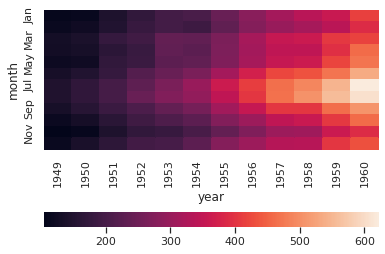

In [104]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

grid_kws = {"height_ratios": (.9, .1), "hspace": 0.8} #height ratios-> size of each graph; hspace -> sep between charts
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(flights, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})


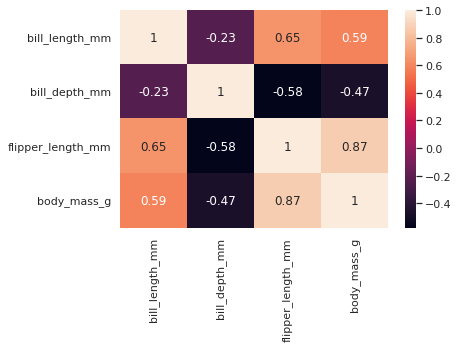

In [105]:
corr = penguins_df.corr() # Obtenemos la matriz de correlación para las variables númericas del set de datos de pingüinos

sns.heatmap(corr,annot=True) #Generamos el heatmap anotado, muestra las correlaciones
plt.show()

## <font color='blue'>Histogramas</font>

Recientemente, en la última versión de Seaborn (0.11), se implementó el método `histplot`. Tal como lo menciona el título de esta sección, corresponde al uso de histogramas, y la lógica de uso se mantiene. Existe un parámetro, denominado `kde`, el cual recibe un valor `Booleano` y nos permite graficar el *Kernel Density Estimate*. Esta característica permite estimar una distribución continua desde el histograma, y por lo mismo podríamos ver la existencia de asimetría presente en los datos a graficar.

[Documentación Histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html?highlight=histplot#seaborn.histplot)


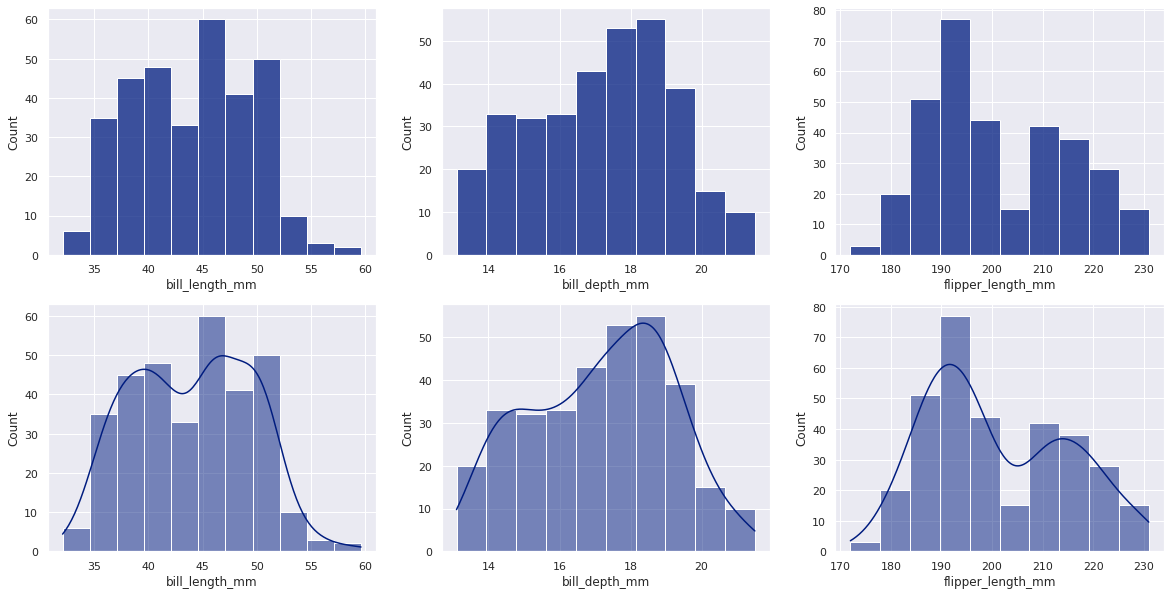

In [106]:
fig, ax = plt.subplots(2,3, figsize=(20,10), )
# subplots con el método histoplot a secas
sns.histplot(x='bill_length_mm', data = penguins_df, ax = ax[0,0])
sns.histplot(x='bill_depth_mm', data = penguins_df, ax = ax[0,1])
sns.histplot(x='flipper_length_mm', data = penguins_df, ax = ax[0,2])
#subplots con el método histplot y el gráfico de KDE
sns.histplot(x='bill_length_mm', data = penguins_df, kde=True, ax = ax[1,0])
sns.histplot(x='bill_depth_mm', data = penguins_df, kde=True, ax = ax[1,1])
sns.histplot(x='flipper_length_mm', data = penguins_df, kde=True, ax = ax[1,2])
plt.show()

##<font color='blue'>Diagramas de caja y bigotes (Boxplots)</font>

`Seaborn`, como buena librería de cómputo estadístico también provee el método para realizar diagramas de cajas y bigotes. Las ventajas siguen siendo la facilidad de uso de `Seaborn` por sobre `matplotlib`, además de la mejora estética al momento de uso de colores, y modificaciones a los marcadores de outlets:

[Documentación Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)


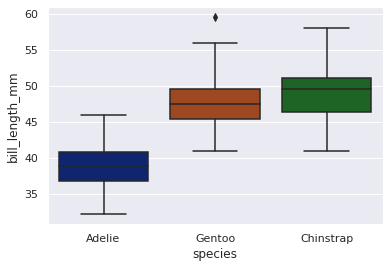

In [107]:
sns.boxplot(x='species',y='bill_length_mm',data=penguins_df) #y media de bill_length_mm por species
plt.show()

Recordando que al estar utilizando `seaborn`, podemos hacer la separación de nuestros gráficos según las columnas que nosotros especifiquemos. A modo de ejemplo, separaremos los boxplots obtenidos anteriormente por la columna `sex`:

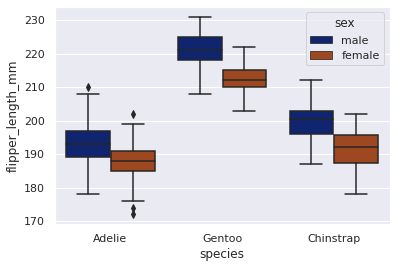

In [108]:
sns.boxplot(x='species',y='flipper_length_mm',data=penguins_df,hue='sex') #hue separa el gráfico anterior por edad
plt.show()

## <font color='green'>Actividad 1:</font>

Utilizaremos una base de datos especificamente: Los pingüinos de Palmer:

<center><img src="https://drive.google.com/uc?id=1gCG9wP4iAKh-0bNX-uQB9X6K5nlTnDgG" alt="drawing" width=600px/></center>

El set de datos de los pingüinos, específicamente “Palmer Penguins”, corresponde a un set de datos libre de uso. La idea es presentar una alternativa a un set de datos de similares características: El set de datos de Iris. En este caso, se tomaron diferentes medidas para 344 pingüinos en el archipiélago de Palmer en la Antártica. Las medidas que se tomaron fueron: “Bill Length”, “Bill Depth”, “Flipper Length” y “Body Mass” .
<center><img src="https://drive.google.com/uc?id=1DNeukLYfpfYWgz1r7XBEL_nV1905ltdM" alt="drawing" width=500px/><img src="https://drive.google.com/uc?id=1y5xWqxYDgU_FDm8WAJvXuIlFOhOHgC15" alt="drawing" width=600px/></center>

1.- Obtener la matriz de correlación y graficarla

2.- Graficar utilizando diagramas de dispersión pares de variables con: Alta Correlación, Nula Correlación y Correlación Negativa

3.- Generar tres histogramas para las posibles variables que existen en el set de datos

4.- Generar un gráfico de barras con la cantidad de pingüinos en cada isla

5.- Generar un gráfico de torta con la cantidad de pingüinos según especie

6.- Generar una tabla de contingencia con la cantidad de según especies e islas, y luego graficarlas



**Nota:** Para el punto 4, una pequeña ayuda puede ser la función: `np.unique(x, return_counts=True)` 

[Documentación np.unique](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)



# <font color='orangered'>Aplicando estilos a los gráficos:</font>

## <font color='orangered'>1.- Obtener la matriz de correlación y graficarla</font>

In [109]:
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

sns.set(context='notebook',
        style={'axes.facecolor': '#eaeaff',
               'figure.facecolor': '#eaeaff',
               'axes.edgecolor': '#0F0F0F',
               'text.color': 'navy',
               'xtick.color': 'navy',
               'ytick.color': 'navy',
               'grid.color': '#eaeaff'
               },
        palette=['crimson', 'darkcyan', 'slateblue', 'orangered'])

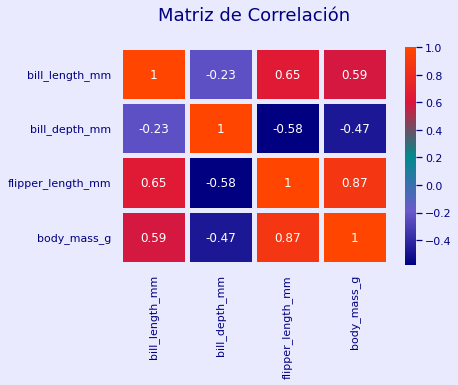

In [110]:
#1
corr  = penguins_df.corr()
sns.heatmap(corr, annot=True, linewidths=4, linecolor='#eaeaff',
            cmap=mcolors.LinearSegmentedColormap.from_list("", ['navy', 'slateblue', 'darkcyan', 'crimson', 'orangered']))
plt.title('Matriz de Correlación' + '\n', fontsize=18)
plt.show()

## <font color='orangered'>2.- Graficar utilizando diagramas de dispersión pares de variables con: Alta Correlación, Nula Correlación y Correlación Negativa</font>



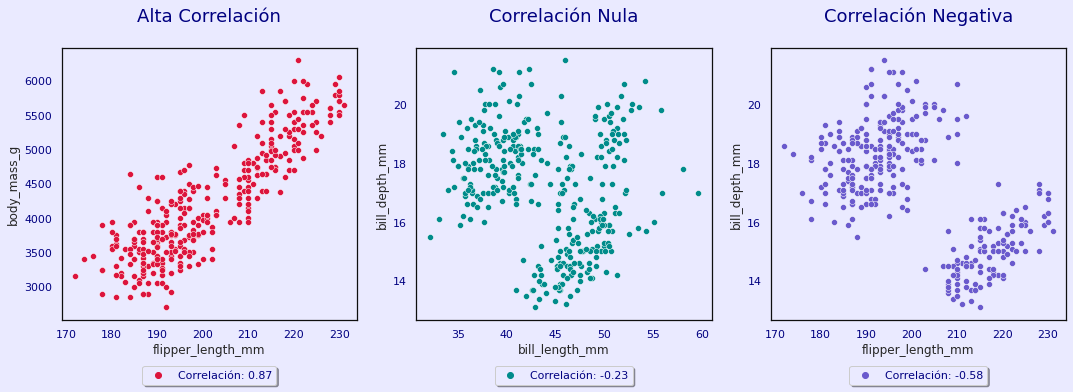

In [111]:
#2
titles = ['Alta Correlación', 'Correlación Nula', 'Correlación Negativa']
x = ['flipper_length_mm', 'bill_length_mm', 'flipper_length_mm']
y = ['body_mass_g', 'bill_depth_mm', 'bill_depth_mm']
sc_color = ['crimson', 'darkcyan', 'slateblue']

plt.subplots(1, len(titles), figsize=(6*len(titles), 5))
for i, title in enumerate(titles):
    plt.subplot(1, len(titles), i + 1)
    sns.scatterplot(x=penguins_df[x[i]], y = penguins_df[y[i]], color=sc_color[i])
    plt.legend([Line2D([], [], marker='o', color=sc_color[i], linestyle='None')], [f'Correlación: {corr[x[i]][y[i]].round(2)}'], 
               loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)
    plt.title(title + '\n', fontsize=18)
plt.show()

## <font color='orangered'>3.- Generar tres histogramas para las posibles variables que existen en el set de datos</font>

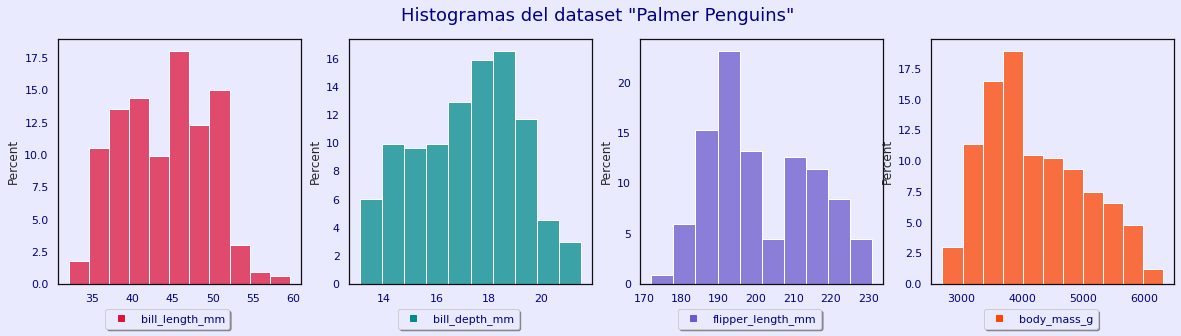

In [112]:
#3
columns = penguins_df._get_numeric_data().columns.to_list()
sc_color = ['crimson', 'darkcyan', 'slateblue', 'orangered']

plt.subplots(1, len(columns), figsize=(5*len(columns), 4.5))

for i, col in enumerate(columns):
    plt.subplot(1, len(columns), i + 1)
    sns.histplot(penguins_df[col], color=sc_color[i], stat="percent")
    plt.xlabel('')
    plt.legend([Line2D([], [], marker='s', color=sc_color[i], linestyle='None')], [f'{col}'], 
               loc='upper center', bbox_to_anchor=(0.45, -0.08), fancybox=True, shadow=True)

plt.suptitle('Histogramas del dataset "Palmer Penguins"', fontsize=18)
plt.show()

## <font color='orangered'>4.- Generar un gráfico de barras con la cantidad de pingüinos en cada isla</font>

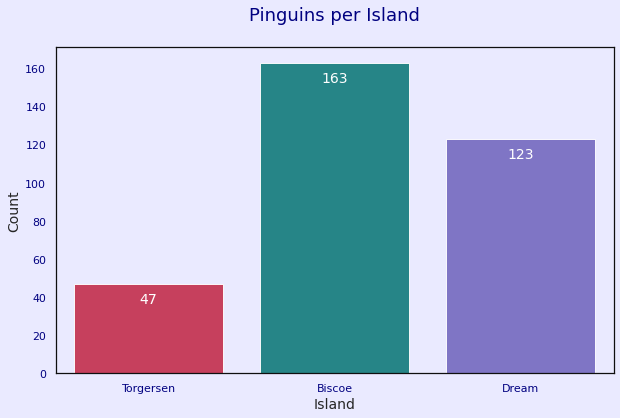

In [113]:
#4
plt.subplots(1, 1, figsize=(10, 6))

bp = sns.barplot(x='island', y ='bill_depth_mm', data=penguins_df, ci=None, estimator=pd.Series.count, alpha=0.9)
# Anotaciones en color blanco
for p in bp.patches:
    bp.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -15), textcoords = 'offset points', color='w', fontsize=14)
# Titulos graficos, ejes y leyenda
bp.set_xlabel('Island', fontsize=14)
bp.set_ylabel('Count', fontsize=14)
bp.set_title('Pinguins per Island' + '\n', fontsize=18)
plt.show()

## <font color='orangered'>5.- Generar un gráfico de torta con la cantidad de pingüinos según especie</font>


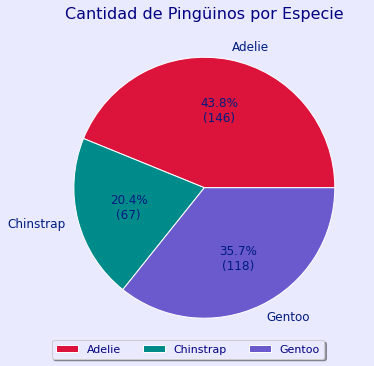

In [114]:
#5
def mostrar_datos(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return f"{round(pct,1)}%\n({absolute})".format(pct, absolute)

n_penguins = penguins_df.groupby('species').count()['island']

plt.figure(figsize=(10,6))
plt.pie(n_penguins,
        autopct=lambda pct: mostrar_datos(pct, n_penguins),
        labels=n_penguins.keys(),
        textprops={'color':"b", 'size':12}
        )
plt.title('Cantidad de Pingüinos por Especie', size=16)
plt.legend(loc='upper center', bbox_to_anchor=(0.45, 0.05), fancybox=True, shadow=True, ncol=5)
plt.show()

## <font color='orangered'>6.- Generar una tabla de contingencia con la cantidad de según especies e islas, y luego graficarlas</font>


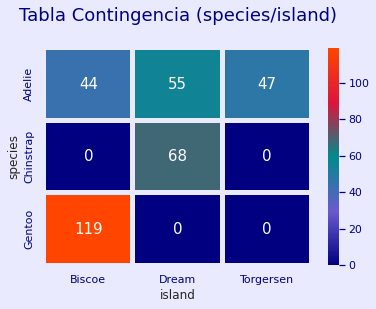

In [115]:
#6
sns.heatmap(pd.crosstab(penguins_df['species'], penguins_df['island']), 
            annot=True, fmt='d', annot_kws={"size": 15}, linewidths=4, linecolor='#eaeaff',
            cmap=mcolors.LinearSegmentedColormap.from_list("", ['navy', 'slateblue', 'darkcyan', 'crimson', 'orangered']))
plt.title('Tabla Contingencia (species/island)' + '\n', fontsize=18)
plt.show()


In [116]:
pd.crosstab(penguins_df['species'], penguins_df['island'])

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,55,47
Chinstrap,0,68,0
Gentoo,119,0,0
